In [1]:
import sys
sys.path.append("../../src")
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from sindy_utils import *
import pickle
import pandas as pd

In [2]:
def addNoise(x, noise_ratio):
    signal_power = np.sqrt(np.mean(x**2))
    sigma = noise_ratio*signal_power
    noise = np.random.normal(0, sigma, x.shape)
    xobs = x + noise
    return xobs

In [3]:
save_data = True
# p1_train = np.array([1.5])
# p2_train = np.array([2.0])
p1_train = np.linspace(1.5,2,4) # w1 of initial condition
p2_train = np.linspace(2,2.5,4) # w2 of initial condition
num_train = p1_train.size * p2_train.size  # initial number of training +data
dt = 1e-2
tstop = 3
nt = int(tstop/dt)+1
noise_ratio = 0.1
if num_train > 1:
    data = pickle.load(open(f"/usr/workspace/he10/data/MFEMex9/local{num_train}_tstop{tstop:.1f}.p", "rb"))
else:
    data = pickle.load(open(f"/usr/workspace/he10/data/MFEMex9/local{num_train}_p1{p1_train[0]:.1f}_p2{p2_train[0]:.1f}_tstop{tstop:.1f}.p", "rb"))

for i in range(num_train):
    print(f"case {i}: params: {data['param'][i]}, x shape: {data['data'][i]['x'].shape}")

case 0: params: [1.5 2. ], x shape: (301, 9216)
case 1: params: [1.5        2.16666667], x shape: (301, 9216)
case 2: params: [1.5        2.33333333], x shape: (301, 9216)
case 3: params: [1.5 2.5], x shape: (301, 9216)
case 4: params: [1.66666667 2.        ], x shape: (301, 9216)
case 5: params: [1.66666667 2.16666667], x shape: (301, 9216)
case 6: params: [1.66666667 2.33333333], x shape: (301, 9216)
case 7: params: [1.66666667 2.5       ], x shape: (301, 9216)
case 8: params: [1.83333333 2.        ], x shape: (301, 9216)
case 9: params: [1.83333333 2.16666667], x shape: (301, 9216)
case 10: params: [1.83333333 2.33333333], x shape: (301, 9216)
case 11: params: [1.83333333 2.5       ], x shape: (301, 9216)
case 12: params: [2. 2.], x shape: (301, 9216)
case 13: params: [2.         2.16666667], x shape: (301, 9216)
case 14: params: [2.         2.33333333], x shape: (301, 9216)
case 15: params: [2.  2.5], x shape: (301, 9216)


In [4]:
for i in range(len(data['data'])):
    data['data'][i]['x'] = addNoise(data['data'][i]['x'],noise_ratio)   

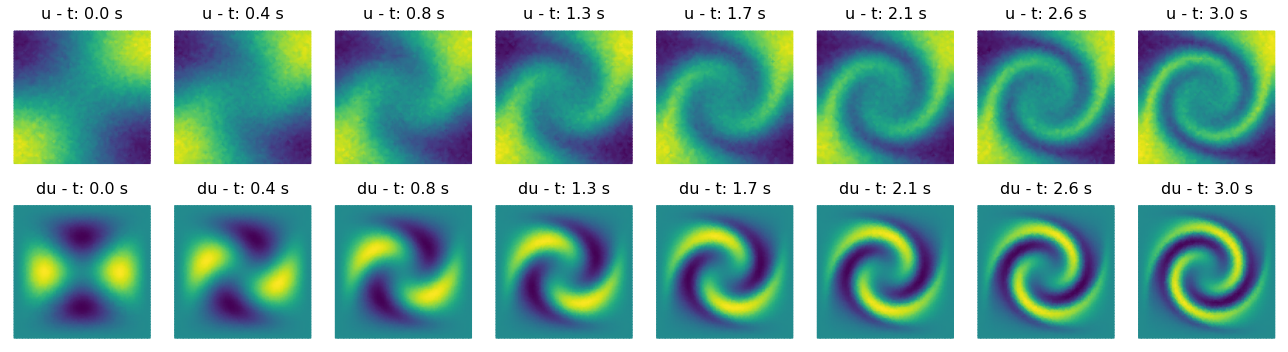

In [5]:
vert = np.loadtxt('/g/g92/he10/Research/data/MFEMex9/vertex.txt')
triang = tri.Triangulation(vert[:,0], vert[:,1])
            
nplot = 8
step_list = np.linspace(0,nt-1,nplot,dtype=int)

fig = plt.figure(figsize=(18,5))
for i,step in enumerate(step_list):
    ax = fig.add_subplot(2,nplot,i+1)
    ax = plt.gca()
    tpc = ax.tripcolor(triang, data['data'][0]['x'][step], shading='gouraud')
    ax.set_title(f'u - t: {step/nt*tstop:.1f} s',fontsize=16)
    plt.axis('off')
    
for i,step in enumerate(step_list):
    ax = fig.add_subplot(2,nplot,i+1+nplot)
    ax = plt.gca()
    tpc = ax.tripcolor(triang, data['data'][0]['dx'][step], shading='gouraud')
    ax.set_title(f'du - t: {step/nt*tstop:.1f} s',fontsize=16)
    plt.axis('off')
    
plt.tight_layout()

In [6]:
# save data
if save_data:
    num_case = len(data['data'])
    data_path = '/usr/workspace/he10/data/MFEMex9'
    if not os.path.exists(data_path):
        os.makedirs(data_path)
    if num_case > 1:
        if noise_ratio > 0:
            pickle.dump(data, open(data_path+f"/local{num_case}_tstop{tstop:.1f}_noise{noise_ratio:.2f}.p", "wb"))
        else:
            pickle.dump(data, open(data_path+f"/local{num_case}_tstop{tstop:.1f}.p", "wb"))
    else:
        if noise_ratio > 0:
            pickle.dump(data, open(data_path+f"/local1_p1{p1_train[0]:.1f}_p2{p2_train[0]:.1f}_tstop{tstop:.1f}_noise{noise_ratio:.2f}.p", "wb"))
        else:
            pickle.dump(data, open(data_path+f"/local1_p1{p1_train[0]:.1f}_p2{p2_train[0]:.1f}_tstop{tstop:.1f}.p", "wb"))